In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

Haversine distance is primarily used to calculate the distance between two points on the surface of a sphere. such as measuring distance between two locations on the earth


In [49]:
def haversine_distance(df, lat1, lat2, long1, long2):
    
    r = 6371 #average radius of earth in kilometers
    
    phi1 = np.radians(df[lat1])
    
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2] - df[lat1])
    
    delta_lambda = np.radians(df[long2] - df[long1])
    
    a = np.sin(delta_phi/2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
    d = r * c
    
    return d
    
    
    

Manhattan distance(L1 norm or taxicab distance) - It is often used in machine learning especially in clustering algorithms or when measuring distance in grid like structures such as a chessboard.for ex given two points (x1, y1) and (x2, y2) the manhattan distance is |x2-x1| + |y2-y1|

In [62]:
def dummy_manhattan_distance(df, lat1, long1, lat2, long2):
    a = haversine_distance(df, lat1, lat1, long1, long2)
    b = haversine_distance(df, lat1, lat2, long1, long1)
    return a + b

The provided Python function calculates the bearing (azimuth) between two sets of geographical coordinates (latitude and longitude). The bearing is the compass direction from the starting point to the destination point.

In [68]:
def bearing_array(df,lat1, long1, lat2, long2):
    AVG_EARTH_RADIUS = 6371  # in km
    long_delta_rad = np.radians(long2 - long1)
    lat1, long1, lat2, long2 = map(np.radians, (lat1, long1, lat2, long2))
    y = np.sin(long_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(long_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [5]:
df = pd.read_csv(r'C:\Users\Asus\OneDrive\Desktop\nyc_taxi\Group5-project\train.csv')

In [6]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [8]:
print(df.isnull().sum()) #no nan values


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [10]:
#check for duplicates
print('No of duplicates, trip ids : {}'.format(len(df) - len(df.drop_duplicates())))  #no duplicates

No of duplicates, trip ids : 0


In [12]:
df.pickup_latitude.min(), df.dropoff_latitude.min()

(34.35969543457031, 32.1811408996582)

In [14]:
df.pickup_latitude.max(), df.dropoff_latitude.max()

(51.88108444213867, 43.92102813720703)

In [13]:
df.pickup_longitude.min(), df.dropoff_longitude.min()

(-121.93334197998048, -121.9333038330078)

In [15]:
df.pickup_longitude.max(), df.dropoff_longitude.max()

(-61.33552932739258, -61.33552932739258)

In [16]:
print('Trip duration in seconds: {} to {}'.format(
    df.trip_duration.min(), df.trip_duration.max()
))

Trip duration in seconds: 1 to 3526282


In [17]:
print('Vendors cnt: {}'.format(len(df.vendor_id.unique()))) #only 2 unique vendors

Vendors cnt: 2


In [18]:
print('Passengers: {} to {}'.format(df.passenger_count.min(),df.passenger_count.max()))

Passengers: 0 to 9


In [23]:
#finding empty trips

In [27]:
df[df.passenger_count == 0].shape

(60, 11)

In [29]:
print('Empty trips: {}'.format(df[df.passenger_count == 0].shape[0]))


Empty trips: 60


In [30]:
df = df[df['passenger_count'] > 0]

In [31]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [32]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)


In [33]:
df.loc[:, 'pickup_date'] = df['pickup_datetime'].dt.date

In [34]:
df.loc[:, 'dropoff_date'] = df['dropoff_datetime'].dt.date

In [35]:
df['check_trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).map(lambda x : x.total_seconds())

In [36]:
duration_difference = df[np.abs(df['check_trip_duration'].values  - df['trip_duration'].values) > 1]

In [37]:
duration_difference

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,dropoff_date,check_trip_duration


In [38]:
print('Trip_duration and datetimes are ok.') if len(duration_difference[['pickup_datetime', 'dropoff_datetime', 'trip_duration', 'check_trip_duration']]) == 0 else print('mismatch')

Trip_duration and datetimes are ok.


(array([1.45858e+06, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.0000000e+00, 3.5262910e+05, 7.0525720e+05, 1.0578853e+06,
        1.4105134e+06, 1.7631415e+06, 2.1157696e+06, 2.4683977e+06,
        2.8210258e+06, 3.1736539e+06, 3.5262820e+06]),
 <BarContainer object of 10 artists>)

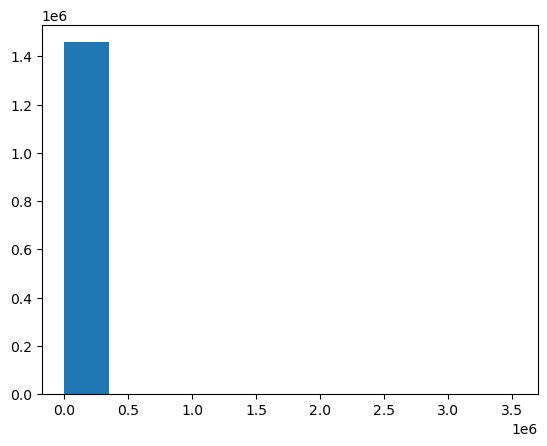

In [45]:
plt.hist(df['trip_duration'], bins = 10)

The max trip duration is ~ 1000 hours.So will be using log transformation to visualise and data wrangling as it has wide range of values

In [41]:
df['trip_duration'].max() // 3600

979

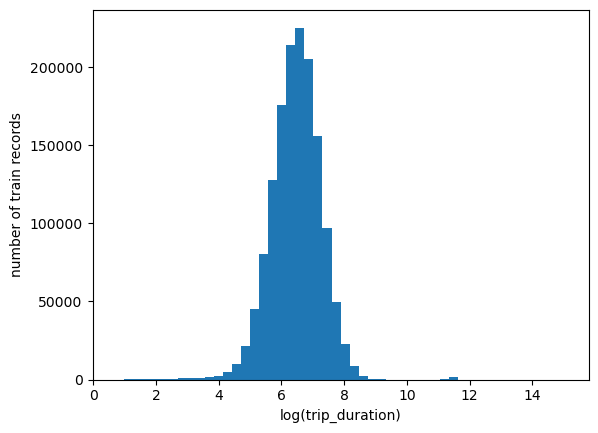

In [46]:
df['log_trip_duration'] = np.log(df['trip_duration'].values + 1)
plt.hist(df['log_trip_duration'].values, bins = 50)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()



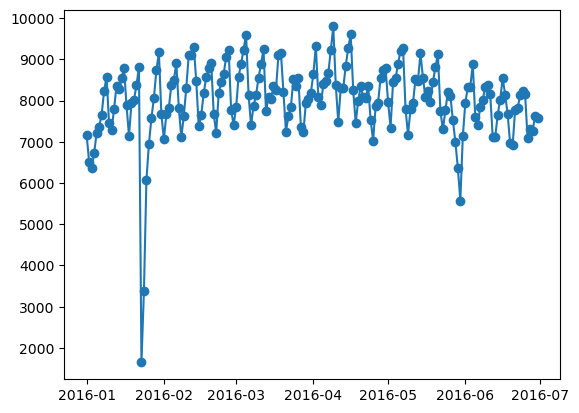

In [48]:
plt.plot(df.groupby('pickup_date').count()[['id']], 'o-')


In [53]:
df.columns.to_list()

['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration',
 'pickup_date',
 'dropoff_date',
 'check_trip_duration',
 'log_trip_duration']

In [58]:
df.loc[:, 'distance_haversine'] = haversine_distance(df, 'pickup_latitude', 'dropoff_latitude', 'pickup_longitude','dropoff_longitude')


In [60]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,dropoff_date,check_trip_duration,log_trip_duration,distance_haversine
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2016-03-14,455.0,6.122493,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,2016-06-12,663.0,6.498282,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,2016-01-19,2124.0,7.661527,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2016-04-06,429.0,6.063785,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,2016-03-26,435.0,6.077642,1.188588


In [63]:
df.loc[:, 'distance_manhattan'] = dummy_manhattan_distance(df,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [70]:
df.loc[:, 'direction'] = bearing_array(df,df['pickup_latitude'].values, df['pickup_longitude'].values,df['dropoff_latitude'].values, df['dropoff_longitude'].values)

In [71]:
df.loc[:, 'center_latitude'] = (df['pickup_latitude'].values + df['dropoff_latitude'].values) / 2
df.loc[:, 'center_longitude'] = (df['pickup_longitude'].values + df['dropoff_longitude'].values) / 2

In [72]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,dropoff_date,check_trip_duration,log_trip_duration,distance_haversine,distance_manhattan,direction,center_latitude,center_longitude
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2016-03-14,455.0,6.122493,1.498521,1.735433,99.970196,40.766769,-73.973392
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,2016-06-12,663.0,6.498282,1.805507,2.430506,-117.153768,40.734858,-73.989948
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,2016-01-19,2124.0,7.661527,6.385098,8.203575,-159.680165,40.737013,-73.992180
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2016-04-06,429.0,6.063785,1.485498,1.661331,-172.737700,40.713345,-74.011154
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,2016-03-26,435.0,6.077642,1.188588,1.199457,179.473585,40.787865,-73.972988


In [74]:
df[df['distance_haversine'] == 0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,dropoff_date,check_trip_duration,log_trip_duration,distance_haversine,distance_manhattan,direction,center_latitude,center_longitude
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,227,2016-02-29,2016-02-29,227.0,5.429346,0.0,0.0,0.0,40.768963,-73.981819
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,1109,2016-05-10,2016-05-10,1109.0,7.012115,0.0,0.0,0.0,40.775661,-73.959068
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,947,2016-05-16,2016-05-16,947.0,6.854355,0.0,0.0,0.0,40.687336,-73.808487
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,580,2016-01-25,2016-01-25,580.0,6.364751,0.0,0.0,0.0,40.647041,-73.786720
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,27,2016-01-27,2016-01-27,27.0,3.332205,0.0,0.0,0.0,40.816853,-74.209854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456399,id0618137,2,2016-02-17 08:57:04,2016-02-17 09:18:28,1,-73.978859,40.756721,-73.978859,40.756721,N,1284,2016-02-17,2016-02-17,1284.0,7.158514,0.0,0.0,0.0,40.756721,-73.978859
1456627,id1048767,2,2016-02-06 22:01:40,2016-02-06 22:03:47,1,-73.963554,40.768517,-73.963554,40.768517,N,127,2016-02-06,2016-02-06,127.0,4.852030,0.0,0.0,0.0,40.768517,-73.963554
1456989,id2595295,2,2016-03-12 07:37:16,2016-03-12 07:46:42,1,-73.984848,40.728222,-73.984848,40.728222,N,566,2016-03-12,2016-03-12,566.0,6.340359,0.0,0.0,0.0,40.728222,-73.984848
1457114,id0051314,2,2016-04-09 20:34:21,2016-04-09 20:44:53,1,-73.965981,40.770988,-73.965981,40.770988,N,632,2016-04-09,2016-04-09,632.0,6.450470,0.0,0.0,0.0,40.770988,-73.965981


In [76]:
df.loc[:, 'pickup_weekday'] = df['pickup_datetime'].dt.weekday
# df.loc[:, 'pickup_hour_weekofyear'] = df['pickup_datetime'].dt.weekofyear
df.loc[:, 'pickup_hour'] = df['pickup_datetime'].dt.hour
df.loc[:, 'pickup_minute'] = df['pickup_datetime'].dt.minute

In [77]:
df.loc[:, 'pickup_week_hour'] = df['pickup_weekday'] * 24 + df['pickup_hour']

In [81]:
df.loc[:, 'avg_speed_h'] = 1000 * df['distance_haversine'] / df['trip_duration']
df.loc[:, 'avg_speed_m'] = 1000 * df['distance_manhattan'] / df['trip_duration']

In [83]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,distance_manhattan,direction,center_latitude,center_longitude,pickup_weekday,pickup_hour,pickup_minute,pickup_week_hour,avg_speed_h,avg_speed_m
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1.735433,99.970196,40.766769,-73.973392,0,17,24,17,3.293452,3.814139
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2.430506,-117.153768,40.734858,-73.989948,6,0,43,144,2.723239,3.665922
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,8.203575,-159.680165,40.737013,-73.992180,1,11,35,35,3.006167,3.862323
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,1.661331,-172.737700,40.713345,-74.011154,2,19,32,67,3.462700,3.872567
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,1.199457,179.473585,40.787865,-73.972988,5,13,30,133,2.732387,2.757372


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458584 entries, 0 to 1458643
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   id                   1458584 non-null  object        
 1   vendor_id            1458584 non-null  int64         
 2   pickup_datetime      1458584 non-null  datetime64[ns]
 3   dropoff_datetime     1458584 non-null  datetime64[ns]
 4   passenger_count      1458584 non-null  int64         
 5   pickup_longitude     1458584 non-null  float64       
 6   pickup_latitude      1458584 non-null  float64       
 7   dropoff_longitude    1458584 non-null  float64       
 8   dropoff_latitude     1458584 non-null  float64       
 9   store_and_fwd_flag   1458584 non-null  object        
 10  trip_duration        1458584 non-null  int64         
 11  pickup_date          1458584 non-null  object        
 12  dropoff_date         1458584 non-null  object        
 13  ch

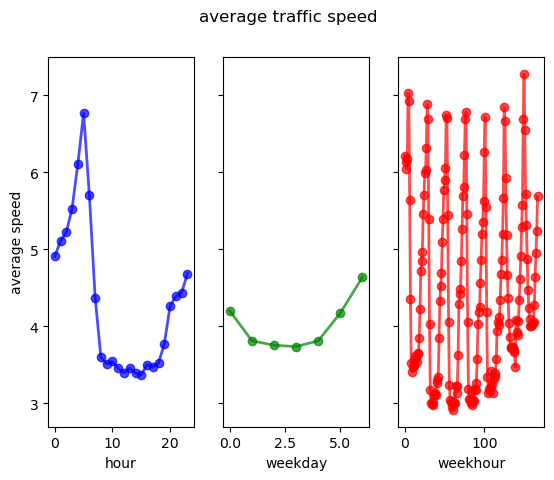

In [86]:
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(df.groupby('pickup_hour')['avg_speed_h'].mean(), 'bo-', lw=2, alpha=0.7)
ax[1].plot(df.groupby('pickup_weekday')['avg_speed_h'].mean(), 'go-', lw=2, alpha=0.7)
ax[2].plot(df.groupby('pickup_week_hour')['avg_speed_h'].mean(), 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('hour')
ax[1].set_xlabel('weekday')
ax[2].set_xlabel('weekhour')
ax[0].set_ylabel('average speed')
fig.suptitle('average traffic speed')
plt.show()

In [87]:
df.pickup_hour.unique()

array([17,  0, 11, 19, 13, 22,  7, 23, 21,  9, 20, 15,  8,  2, 12,  3, 10,
       14, 16,  1, 18,  6,  5,  4])

Text(0, 0.5, 'No of Trips made')

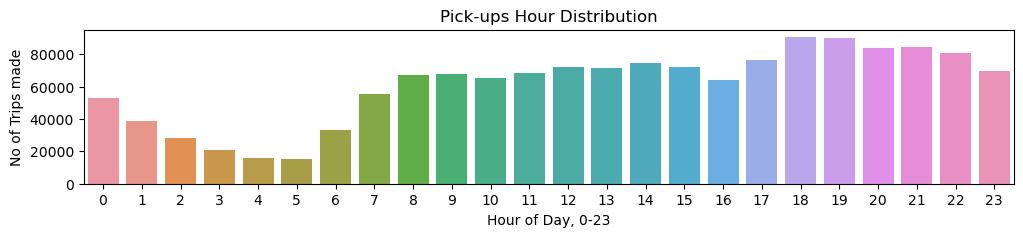

In [88]:
plt.figure(figsize=(12,2))

data = df.groupby('pickup_hour').aggregate({'id':'count'}).reset_index()
sns.barplot(x='pickup_hour', y='id', data=data)

plt.title('Pick-ups Hour Distribution')
plt.xlabel('Hour of Day, 0-23')
plt.ylabel('No of Trips made')